In [1]:
# Hints for question 2
#
# how to calculate the evolution of a probability density
# by the Frobenius-Perron operator of the asymmetric tent map
#
# the map is linear with peak at x=c
# you can make a drawing for yourself and find that
# the maps has 1/c slope in the left branch and -1/(1-c) slope in the right one, i.e.
# f(x)=x/c         in [0,c]
# f(x)=(1-x)/(1-c) in [c,1]

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
c=0.61                # an arbitrary value for the parameter of the map
# we want to generate gridpoints  x_k=k/n, k=0,1,2,...,n
n=1000                # the largest gridpoint index
x=linspace(0,1,n+1)   # the gridpoints
p0=linspace(0,2,n+1)  # the list of the values of an initial density at the grid points

In [4]:
p1=zeros(n+1)          # create a list where the values of the resulting density will be stored

for i in range(n+1):             # i.e. i=0,1,2,...,n
    j=round(i*c)                 # left preimage index
    k=round(n-i*(1-c))           # right preimage index
    p1[i]=p0[j]*c + p0[k]*(1-c)  # the sum of the contribution of the two branches

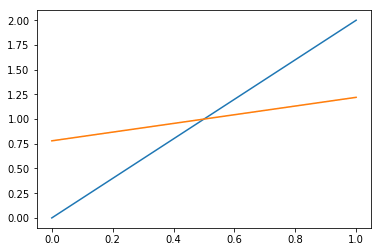

In [5]:
plot(x,p0,x,p1)

In [6]:
# The limiting probability density is a constant 1.
# Here we can already see that p1 is closer to the limiting one than p0.

# Suggestions
#   for more convenient use create a function from these lines
#   which calculates the action of the Frobenius-Perron operator
#   and then iterate it several times and check the decay of the slope

In [7]:
def FP(p):
    p1=zeros(n+1)          # create a list where the values of the resulting density will be stored

    for i in range(n+1):             # i.e. i=0,1,2,...,n
        j=round(i*c)                 # left preimage index
        k=round(n-i*(1-c))           # right preimage index
        p1[i]=p[j]*c + p[k]*(1-c)  # the sum of the contribution of the two branches
    return p1

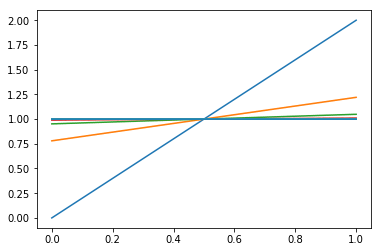

In [8]:
p=p0
plot(x,p)
plist=[p0]
for k in range(10):
    p=FP(p)
    plot(x,p)
    plist.append(p)

0.36351684169042753
0.4994612546681204
0.3467466249175988
0.3112432826852537


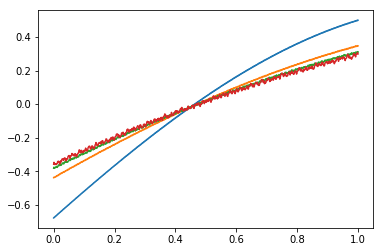

In [9]:
p=sin(pi/2*x)
for k in range(4):
    p=p-mean(p)
    print(max(p))
    p=p/max(p)
    p=FP(p)
    plot(x,p)